# Continuous-armed bandits

## Import libraries and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
from math import ceil, sin, fabs, sqrt, log

In [2]:
from environment.CAB import CAB, EvaluationCAB

from algorithm.MOSS import CAB_MOSS
from algorithm.Greedy import CAB_Greedy
from algorithm.MeDZO import MeDZO, empMeDZO
from algorithm.Zooming import Zooming

## Experimental setup

In [3]:
scenario = 1
nb_rep = 10
horizon = 100000
noise = 1

In [4]:
if scenario == 1:
    alpha = 2
    L = 220.3303193003303
    def f(x):
        return 0.5 * (sin(13*x) * sin(27*x)) + 0.5
elif scenario == 2:
    alpha = 1
    L = 1 / 0.05
    def f(x):
        return max(3.6 * x * (1-x), 1 - 1/0.05*fabs(x-0.05))
elif scenario == 3:
    alpha = 0.5
    L = 2
    def f(x):
        return x * (1-x) * (4 - sqrt(fabs(sin(60*x))))
    
env = CAB(f, noise)

## Compare various algorithms

In [5]:
algorithms = [CAB_MOSS(min(ceil(L**(2/(2*alpha+1))*horizon**(1/(2*alpha+1))), horizon), horizon),
              CAB_Greedy(min(ceil(sqrt(4/3*horizon*log(horizon))), horizon)), 
              MeDZO(horizon, sqrt(horizon))]#, 
              #empMeDZO(horizon, sqrt(horizon)), 
              #Zooming(horizon, L=L, alpha=alpha)]

Start evaluation of CAB_MOSS
0
1
2
3
4
5
6
7
8
9
Regret of CAB_MOSS : 3129.859257186239 +- 143.90100020189382 

Start evaluation of CAB_Greedy
0
1
2
3
4
5
6
7
8
9
Regret of CAB_Greedy : 1983.868908239252 +- 1026.7753243245531 

Start evaluation of MeDZO
0
1
2
3
4
5
6
7
8
9
Regret of MeDZO : 8256.042773854235 +- 347.3352099253665 



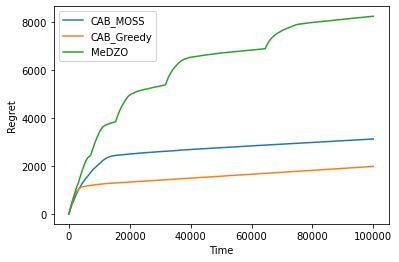

--- 207.50835490226746 seconds ---


In [6]:
start_time = time.time()

plt.figure()
for algo in algorithms:
    print('Start evaluation of', algo.__class__.__name__)
    ev = EvaluationCAB(env, algo, nb_rep, horizon)
    mean_regret = ev.mean_regret()
    std_regret = ev.std_regret()
    print('Regret of', algo.__class__.__name__, ':', mean_regret[-1], '+-', std_regret[-1], '\n')
    
    plt.plot(np.arange(horizon), mean_regret)
    #plt.fill_between(np.arange(horizon), mean_regret-std_regret, mean_regret+std_regret, alpha=.2)
    plt.xlabel('Time')
    plt.ylabel('Regret')

plt.legend([algo.__class__.__name__ for algo in algorithms], loc=0)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))